### PCA Task

##### 뇌암 유전자 발현 예측

https://drive.google.com/file/d/19ZtDpQoR2Qq0_66xUVOU_NOAJnq251Vg/view?usp=sharing

In [75]:
import pandas as pd

brain_df = pd.read_csv('./datasets/brain_cancer.csv', low_memory=False)
brain_df

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,838,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,959,pilocytic_astrocytoma,12.658228,8.843270,7.672655,9.125912,5.495477,8.603892,7.747514,5.828978,...,13.170441,12.676080,14.124837,13.996436,4.913579,4.399176,3.878855,3.680103,4.726784,4.564637
126,960,pilocytic_astrocytoma,12.812823,8.510550,8.729699,9.104402,3.967228,7.719089,7.092496,6.504812,...,13.040267,12.403316,13.978009,13.812916,5.189600,4.912618,3.764800,3.664920,4.628355,4.761351
127,961,pilocytic_astrocytoma,12.706991,8.795721,7.772359,8.327273,6.329383,8.550471,6.613332,6.308945,...,12.825383,12.439265,14.328373,14.008693,4.931460,4.712895,3.913637,3.700964,4.764693,4.834952
128,962,pilocytic_astrocytoma,12.684593,8.293938,7.228186,8.494428,6.049414,8.214729,7.287758,5.732710,...,13.116581,12.657967,14.390346,14.194904,4.871092,4.739400,3.782980,3.920363,4.665584,4.613326


In [76]:
brain_df.isna().sum().sum()

0

In [77]:
brain_df.duplicated().sum()

0

In [78]:
(brain_df.dtypes == 'object').sum()

1

In [79]:
brain_df['target'] = brain_df.type
brain_df = brain_df.drop(columns=['type', 'samples'], axis=1)
brain_df

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,target
0,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,5.898355,5.513410,...,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940,ependymoma
1,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,5.453147,6.173106,...,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416,ependymoma
2,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,8.400266,6.323471,...,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827,ependymoma
3,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,4.900380,6.008684,...,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275,ependymoma
4,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,5.405628,5.279579,...,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450,ependymoma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,12.658228,8.843270,7.672655,9.125912,5.495477,8.603892,7.747514,5.828978,6.926720,4.967369,...,12.676080,14.124837,13.996436,4.913579,4.399176,3.878855,3.680103,4.726784,4.564637,pilocytic_astrocytoma
126,12.812823,8.510550,8.729699,9.104402,3.967228,7.719089,7.092496,6.504812,6.157163,5.082896,...,12.403316,13.978009,13.812916,5.189600,4.912618,3.764800,3.664920,4.628355,4.761351,pilocytic_astrocytoma
127,12.706991,8.795721,7.772359,8.327273,6.329383,8.550471,6.613332,6.308945,7.494852,4.919414,...,12.439265,14.328373,14.008693,4.931460,4.712895,3.913637,3.700964,4.764693,4.834952,pilocytic_astrocytoma
128,12.684593,8.293938,7.228186,8.494428,6.049414,8.214729,7.287758,5.732710,6.296021,5.140635,...,12.657967,14.390346,14.194904,4.871092,4.739400,3.782980,3.920363,4.665584,4.613326,pilocytic_astrocytoma


In [80]:
brain_df.target.value_counts()

target
ependymoma               46
glioblastoma             34
medulloblastoma          22
pilocytic_astrocytoma    15
normal                   13
Name: count, dtype: int64

In [81]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=124)
featrues, targets = brain_df.iloc[:, :-1], brain_df.target
over_features, over_targets = smote.fit_resample(featrues, targets)

print('SMOTE 적용 전:\n',pd.Series(targets).value_counts() )
print('SMOTE 적용 후:\n',pd.Series(over_targets).value_counts() )

SMOTE 적용 전:
 target
ependymoma               46
glioblastoma             34
medulloblastoma          22
pilocytic_astrocytoma    15
normal                   13
Name: count, dtype: int64
SMOTE 적용 후:
 target
ependymoma               46
glioblastoma             46
medulloblastoma          46
normal                   46
pilocytic_astrocytoma    46
Name: count, dtype: int64


In [82]:
over_brain_df = pd.DataFrame(over_features, columns=brain_df.iloc[:, :-1].columns)
over_brain_df.shape

(230, 54675)

In [83]:
from sklearn.preprocessing import StandardScaler

brain_scaled = StandardScaler().fit_transform(over_brain_df)
brain_scaled

array([[ 0.46141729, -1.81941344, -0.66844475, ...,  0.03745392,
        -0.73088731,  0.51678165],
       [ 1.12255599, -1.18825357, -0.32814061, ..., -0.84687494,
        -1.28330601, -0.91112746],
       [ 1.12341923, -0.26438474,  1.16378641, ..., -0.67332221,
        -0.42697637,  0.06876745],
       ...,
       [ 0.9998912 ,  0.20856455,  0.05853888, ...,  2.44684052,
         0.74544935, -0.55580642],
       [ 1.20280913, -0.37826478, -0.20163097, ..., -0.61251893,
        -1.55710557, -0.56057334],
       [ 1.27532483, -0.45297588, -0.29946538, ..., -0.30345623,
        -2.0817422 ,  0.00290743]])

In [84]:
over_brain_scaled_df = pd.DataFrame(brain_scaled, columns=brain_df.iloc[:, :-1].columns)
over_brain_scaled_df['target'] = over_targets
over_brain_scaled_df

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,target
0,0.461417,-1.819413,-0.668445,-0.115935,-0.917752,-1.108086,-1.499016,0.744524,-0.023740,-0.197059,...,-3.224403,-3.381018,-2.770055,1.021725,0.305512,0.825537,0.037454,-0.730887,0.516782,ependymoma
1,1.122556,-1.188254,-0.328141,1.079314,-0.274395,-0.591866,-1.202725,2.632674,-0.547329,0.707357,...,-1.138548,-0.741859,-0.834911,0.151380,0.422341,-0.881550,-0.846875,-1.283306,-0.911127,ependymoma
2,1.123419,-0.264385,1.163786,0.889913,-0.699583,-0.142527,-1.639415,1.293624,2.918642,0.913500,...,-0.626523,-0.268383,-0.597631,0.535331,1.162320,0.550531,-0.673322,-0.426976,0.068767,ependymoma
3,0.412513,0.578779,-0.929939,-0.990578,-0.938864,0.758288,-0.583100,-0.039773,-1.197413,0.481941,...,-1.020671,-0.756263,-0.904159,-1.166158,-0.459508,-0.188878,0.248032,0.766989,-0.746205,ependymoma
4,0.695787,0.100049,4.180087,0.123016,-0.927933,0.039240,-1.271326,0.793291,-0.603214,-0.517631,...,-1.213950,-0.307560,0.413609,-1.461382,-0.150839,-0.813390,-0.773507,-0.808693,-0.634777,ependymoma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,1.092142,-0.300035,0.037750,1.061667,-0.380992,0.527953,-0.065764,1.688287,0.424308,-0.488994,...,-1.045418,-1.101058,-1.450795,0.524499,1.497737,-1.335240,-0.899688,-0.868264,-1.032651,pilocytic_astrocytoma
226,0.689081,-0.368493,-0.066658,-1.153383,1.055158,0.752804,0.140279,-0.630053,1.047684,-0.837990,...,1.042622,1.516768,1.380383,-1.440649,-0.366679,-0.538135,0.624230,0.506374,0.286412,pilocytic_astrocytoma
227,0.999891,0.208565,0.058539,-0.867291,1.182044,1.673976,0.157439,-0.657976,-0.388315,-0.468204,...,-0.074077,0.060647,0.004552,0.031143,0.063883,0.895587,2.446841,0.745449,-0.555806,pilocytic_astrocytoma
228,1.202809,-0.378265,-0.201631,1.015244,-0.341187,0.548127,-0.663046,1.128020,0.412075,-0.208347,...,-0.970435,-0.909130,-1.084827,0.358663,0.818061,-0.818415,-0.612519,-1.557106,-0.560573,pilocytic_astrocytoma


<Axes: >

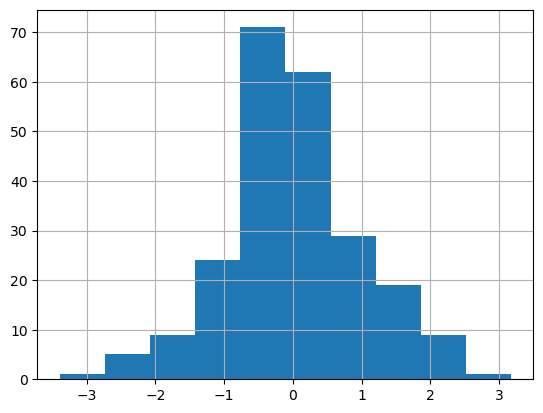

In [85]:
over_brain_scaled_df['1053_at'].hist()

In [86]:
# for column in over_brain_scaled_df.iloc[:, :-1].columns:
#     over_brain_scaled_df = over_brain_scaled_df[over_brain_scaled_df[column].between(-1.96, 1.96)]

# over_brain_scaled_df.shape

In [87]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

brain_pca = pca.fit_transform(over_brain_scaled_df.iloc[:, :-1])
print(brain_pca.shape)

(230, 2)


In [88]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.2275405 0.1113203]
0.33886079457086826


In [89]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
over_brain_scaled_df.target = encoder.fit_transform(over_brain_scaled_df.target)
print(encoder.classes_)

['ependymoma' 'glioblastoma' 'medulloblastoma' 'normal'
 'pilocytic_astrocytoma']


In [90]:
# PCA 환된 데이터의 컬럼명을 각각 pca1, pca2, ..., pcan으로 명명
pca_columns=[f'pca{i+1}' for i in range(2)]
brain_pca_df = pd.DataFrame(brain_pca, columns=pca_columns)
brain_pca_df['target']=over_brain_scaled_df.target
brain_pca_df.head(10)

,pca1,pca2,target
0,184.345816,47.980794,0
1,111.725415,-67.481603,0
2,97.451570,-46.291235,0
3,-83.281980,-79.577494,0
4,89.777083,-44.175920,0
5,145.748063,8.818507,0
6,183.871564,-5.539480,0
7,132.334989,-21.449220,0
8,132.976455,1.941672,0
9,175.413619,2.029238,0


<Axes: xlabel='pca1', ylabel='pca2'>

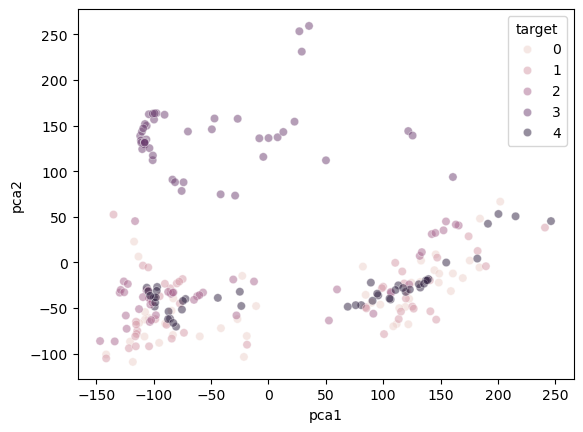

In [93]:
import seaborn as sns

sns.scatterplot(x="pca1", y="pca2", hue='target', data=brain_pca_df, alpha=0.5)

In [94]:
over_brain_scaled_df.target.value_counts()

target
0    46
1    46
2    46
3    46
4    46
Name: count, dtype: int64

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rfc = RandomForestClassifier(random_state=124)
scores = cross_val_score(rfc, over_brain_scaled_df.drop(columns='target', axis=1), over_brain_scaled_df.target, scoring='accuracy', cv=5)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [1.         1.         1.         0.95652174 0.97826087]
원본 데이터 평균 정확도: 0.9869565217391305


In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rfc = RandomForestClassifier(random_state=124)
scores = cross_val_score(rfc, brain_pca_df.drop(columns='target', axis=1), brain_pca_df.target, scoring='accuracy', cv=5)
print('PCA 데이터 교차 검증 개별 정확도:',scores)
print('PCA 데이터 평균 정확도:', np.mean(scores))

PCA 데이터 교차 검증 개별 정확도: [0.52173913 0.54347826 0.56521739 0.63043478 0.63043478]
PCA 데이터 평균 정확도: 0.5782608695652174


##### LDA

In [97]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 타겟 클래스(카테고리) 개수 -n을 전달한다.
lda = LinearDiscriminantAnalysis(n_components=2)

lda.fit(over_brain_scaled_df.iloc[:, :-1], over_brain_scaled_df.target)
brain_lda = lda.transform(over_brain_scaled_df.iloc[:, :-1])

print(brain_lda.shape)

(230, 2)


In [100]:
lda_columns=[f'lda{i+1}' for i in range(2)]
brain_lda_df = pd.DataFrame(brain_lda, columns=lda_columns)
brain_lda_df['target']=over_brain_scaled_df.target
brain_lda_df.head(10)

,lda1,lda2,target
0,-3.869920,1.783429,0
1,-3.623758,1.316861,0
2,-1.793412,-0.069467,0
3,-3.173949,2.428901,0
4,-3.434458,2.116220,0
5,-3.281912,1.984602,0
6,-3.725498,-0.065695,0
7,-3.808827,0.891212,0
8,-4.036262,0.167214,0
9,-2.330940,0.515414,0


In [101]:
print(lda.explained_variance_ratio_)
print(lda.explained_variance_ratio_.sum())

[0.51120914 0.24887928]
0.7600884279016381


<Axes: xlabel='lda1', ylabel='lda2'>

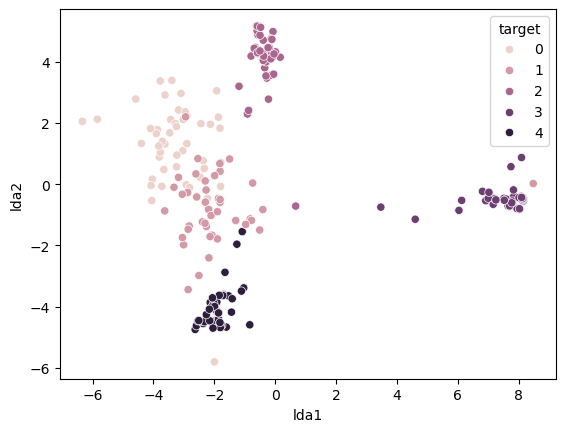

In [104]:
import seaborn as sns

sns.scatterplot(x="lda1", y="lda2", hue='target', data=brain_lda_df, alpha=1)

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rfc = RandomForestClassifier(random_state=124)
scores = cross_val_score(rfc, brain_lda_df.drop(columns='target', axis=1), brain_lda_df.target, scoring='accuracy', cv=5)
print('LDA 데이터 교차 검증 개별 정확도:',scores)
print('LDA 데이터 평균 정확도:', np.mean(scores))

LDA 데이터 교차 검증 개별 정확도: [0.91304348 0.86956522 0.86956522 0.89130435 0.95652174]
LDA 데이터 평균 정확도: 0.9
